In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data Preparation


In [2]:
df = pd.read_csv(r'C:\cpp\iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Cleaning

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop(columns=['Id'],inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.drop(columns=['Species'],inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# Exploratory data analysis


In [12]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtypes=='object':
        categorical.append(i)
    else:
        numerical.append(i)

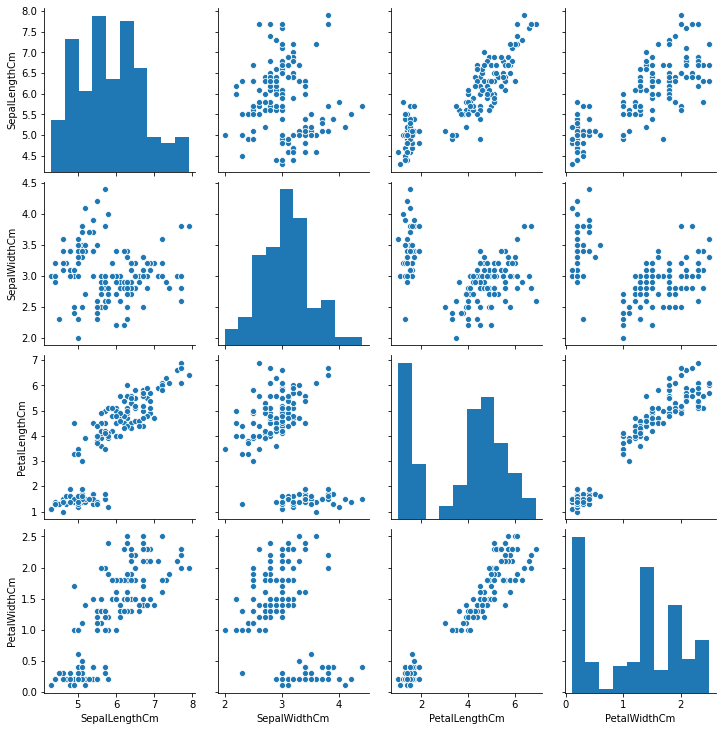

In [13]:
sns.pairplot(df)

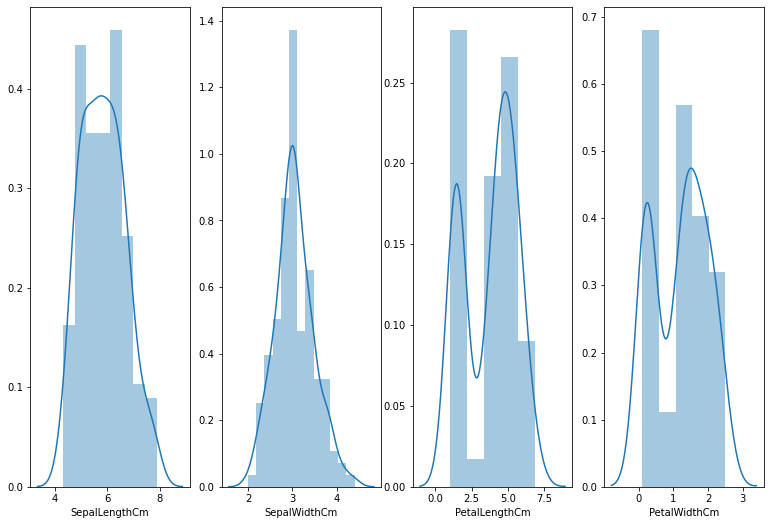

In [14]:
plt.figure(figsize=[20,30])
for i in enumerate(numerical):
    plt.subplot(3,6,i[0]+1)
    sns.distplot(df[i[1]])

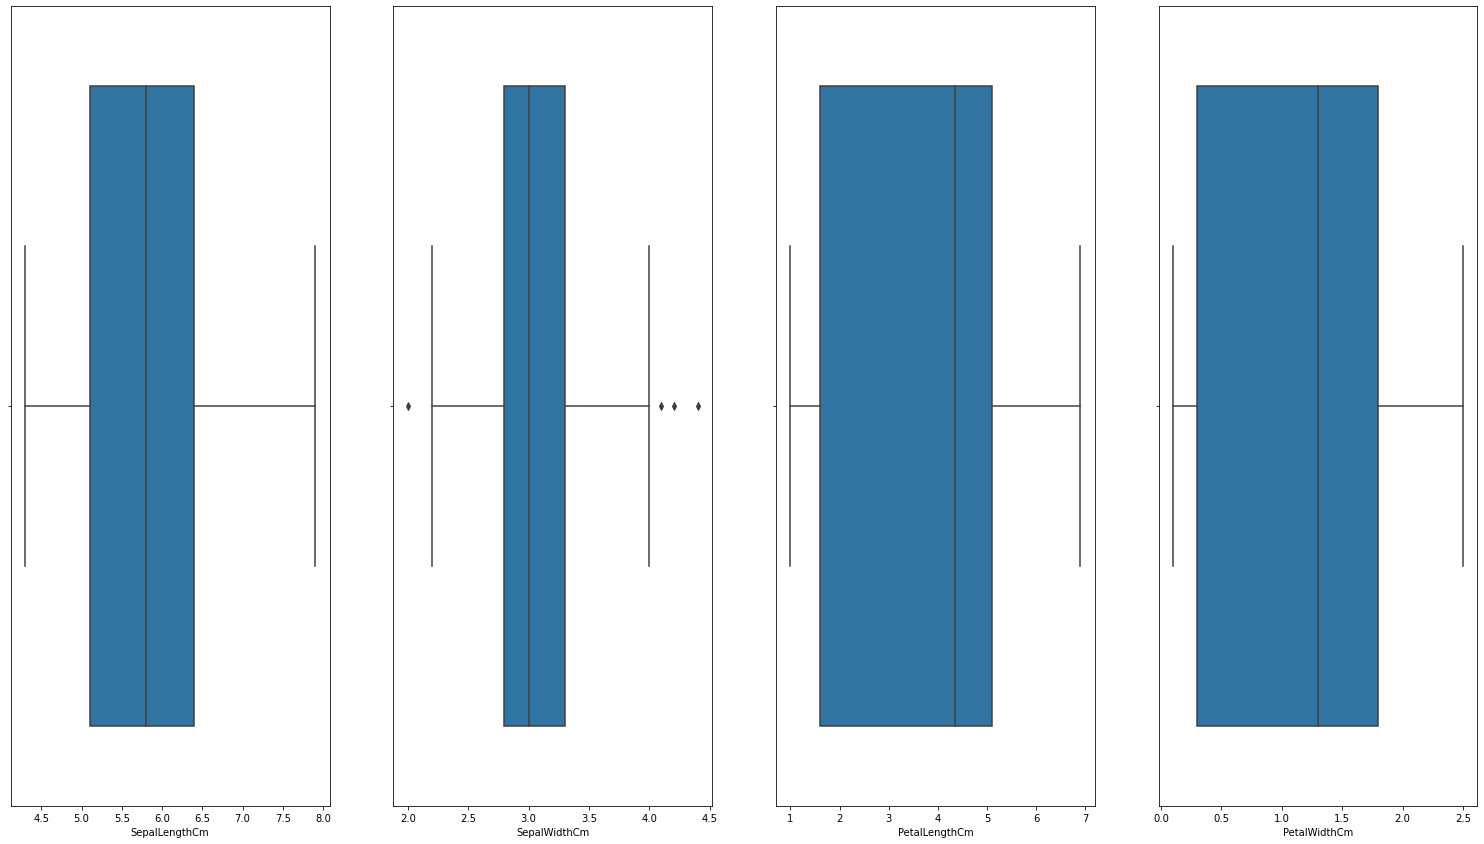

In [15]:
plt.figure(figsize=[40,50])
for i in enumerate(df.columns):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(df[i[1]])

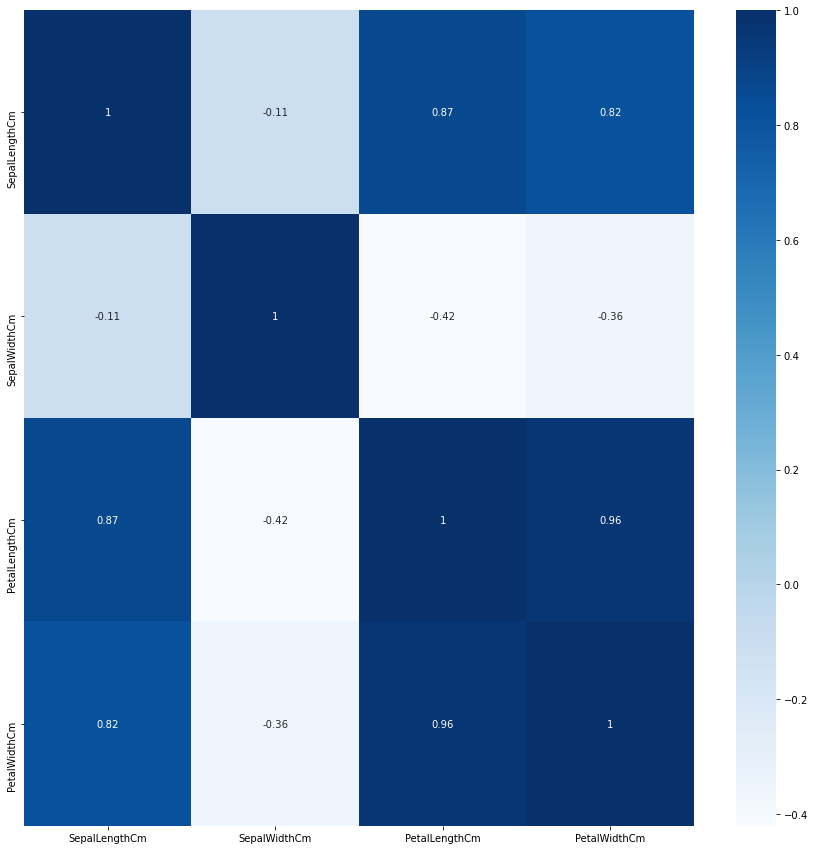

In [16]:
correlation = df.corr()
plt.figure(figsize=[15,15])
sns.heatmap(correlation,annot=True,cmap='Blues')

# Model training

In [17]:
from sklearn.cluster import KMeans

In [18]:
var = []
for i in range(1,11):
    kmc = KMeans(n_clusters=i,random_state=42)
    kmc.fit(df)
    var.append(kmc.inertia_)

Text(0, 0.5, 'WCSS')

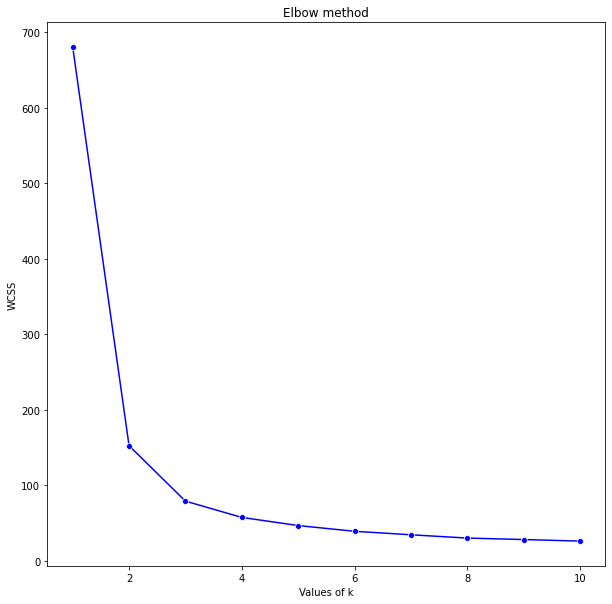

In [19]:
plt.figure(figsize=[10,10])
sns.lineplot(range(1,11),var,color='blue',marker='o')
plt.title('Elbow method')
plt.xlabel('Values of k')
plt.ylabel('WCSS')

In [20]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df)
kmeans.inertia_

78.94084142614601

In [21]:
k_pred = kmeans.predict(df)

In [22]:
print(k_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Visualization of clustered data

In [23]:
df['clusters'] = kmeans.labels_

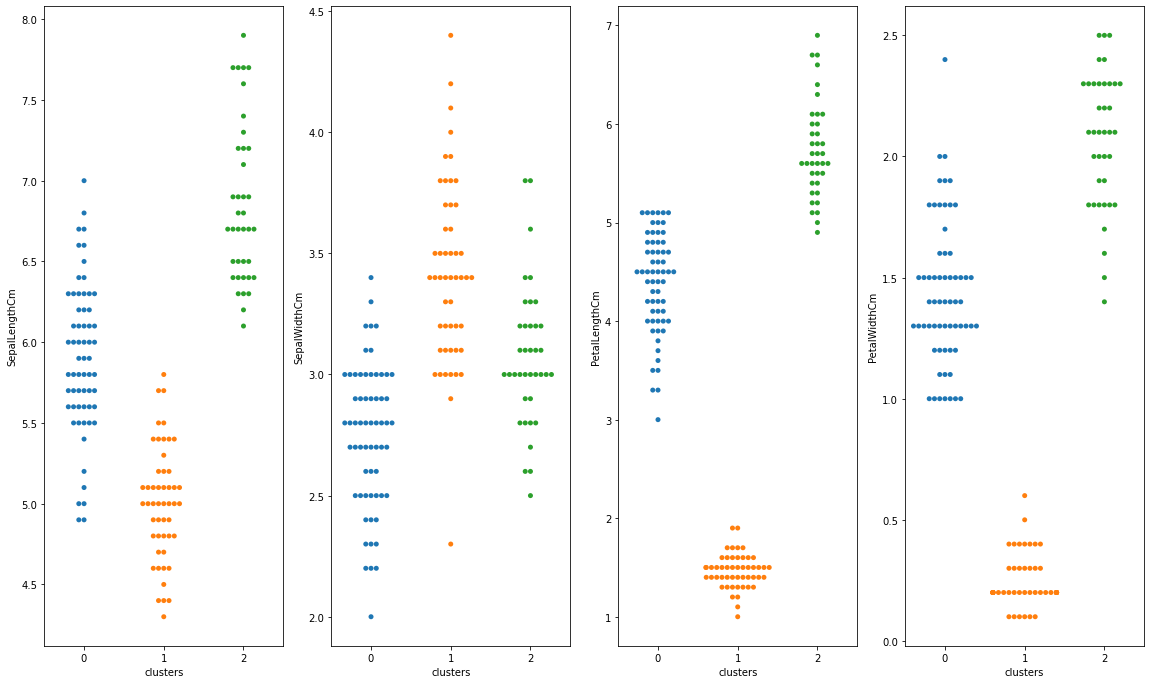

In [24]:
plt.figure(figsize=[30,40])
for i in enumerate(numerical):
    plt.subplot(3,6,i[0]+1)
    sns.swarmplot(df.clusters,df[i[1]])

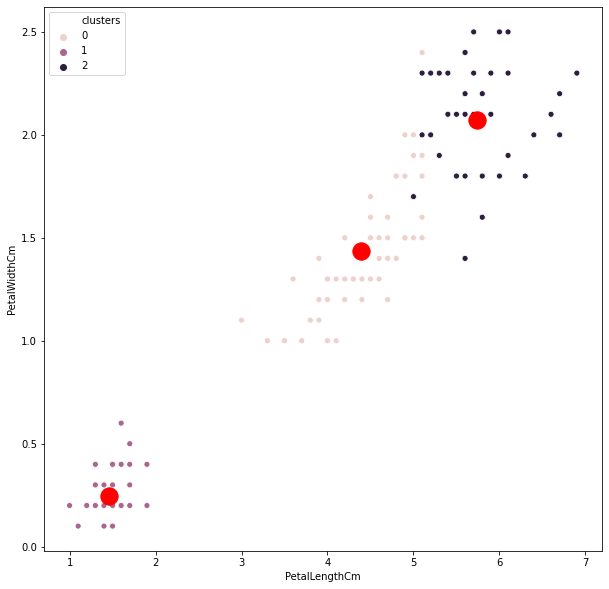

In [25]:
plt.figure(figsize=[10,10])
sns.scatterplot(df.PetalLengthCm,df.PetalWidthCm,hue=df.clusters)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label = 'Centroids')

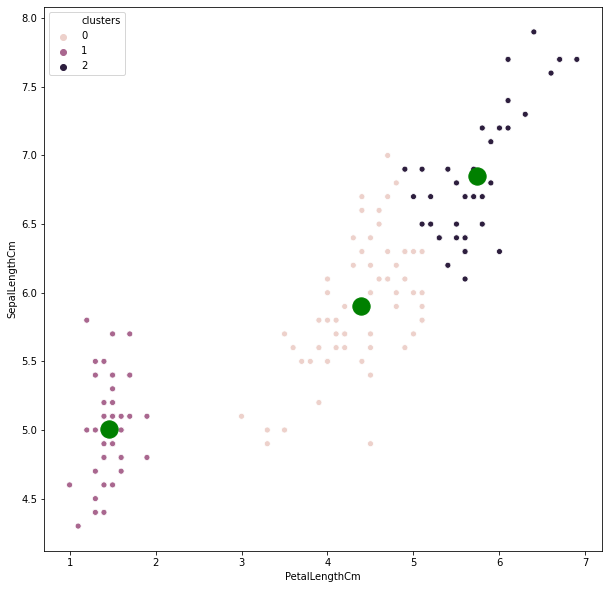

In [26]:
plt.figure(figsize=[10,10])
sns.scatterplot(df.PetalLengthCm,df.SepalLengthCm,hue=df.clusters)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s=300, c='green', label = 'Centroids')

In [27]:
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


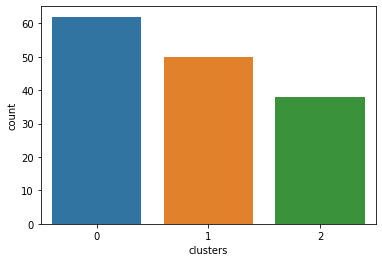

In [28]:
sns.countplot(data=df,x='clusters')

<Figure size 1440x2160 with 0 Axes>

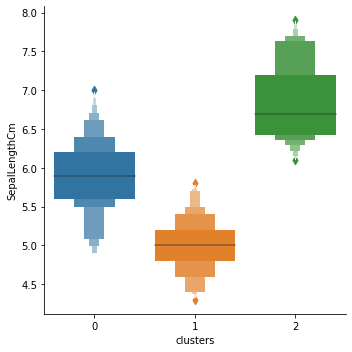

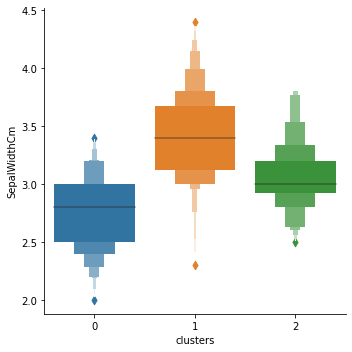

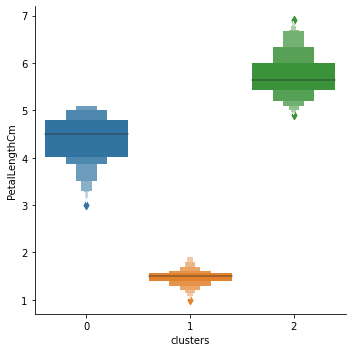

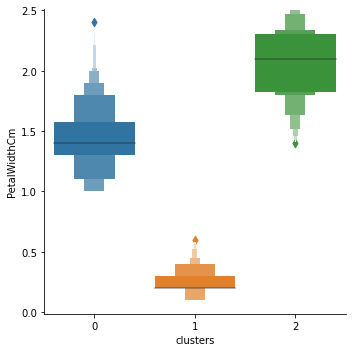

In [29]:
plt.figure(figsize=[20,30])
for i in enumerate(numerical):
    sns.catplot(x='clusters',y=i[1],data=df,kind='boxen')